In [22]:
___Author___='LumberJack Jyss'

In [23]:
print('LumberJack BRUTAL AtidotCom XGBOOST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom XGBOOST
LumberJack Jyss (c)


In [24]:
print('Importation des librairies...')
import statistics
import pickle
import numpy as np
import pandas as pd
import xgboost as xgb
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [25]:
df = pd.read_csv('dataset_ready_to_use.csv')

In [26]:
df = df.dropna()

In [27]:
df.set_index('Local time', inplace=True)
df = df.iloc[:,1:]
df.head()

,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,Volume_usdjpy,...,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd,short,long
Local time,,,,,,,,,,,,,,,,,,,,,
10.04.2004 07:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003130,37.355005,1.210306,1.209246,1.208186,0.000843,1.20888,0,0
10.04.2004 08:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003150,37.355005,1.210175,1.209184,1.208193,0.000783,1.20888,0,0
10.04.2004 09:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003170,37.355005,1.210091,1.209137,1.208183,0.000727,1.20888,0,0
10.04.2004 10:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003188,37.355005,1.209816,1.209060,1.208304,0.000675,1.20888,0,0
10.04.2004 11:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003205,37.355005,1.209662,1.209009,1.208356,0.000627,1.20888,0,0


In [28]:
delta = df.shape[0]
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta,'périodes')
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' périodes \nBloc 2 :',bloc2,' périodes')

Période d'étude :  131560 périodes
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  105248  périodes 
Bloc 2 : 26312  périodes


In [29]:
df['long'].sum(),df['short'].sum()

(3522, 3730)

In [30]:
Xtrain_long = df.iloc[:bloc1,:-1]
Xtrain_long = Xtrain_long.drop(['short'],axis=1)
Xtest_long = df.iloc[bloc1:,:-1]
Xtest_long = Xtest_long.drop(['short'],axis=1)
ytrain_long = df.iloc[:bloc1,-1]
ytest_long = df.iloc[bloc1:,-1]

In [31]:
df.iloc[:bloc1,:-2].head()

,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,Volume_usdjpy,...,Low_eurusd,Close_eurusd,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd
Local time,,,,,,,,,,,,,,,,,,,,,
10.04.2004 07:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,1.20888,0.0,-0.003130,37.355005,1.210306,1.209246,1.208186,0.000843,1.20888
10.04.2004 08:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,1.20888,0.0,-0.003150,37.355005,1.210175,1.209184,1.208193,0.000783,1.20888
10.04.2004 09:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,1.20888,0.0,-0.003170,37.355005,1.210091,1.209137,1.208183,0.000727,1.20888
10.04.2004 10:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,1.20888,0.0,-0.003188,37.355005,1.209816,1.209060,1.208304,0.000675,1.20888
10.04.2004 11:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,1.20888,0.0,-0.003205,37.355005,1.209662,1.209009,1.208356,0.000627,1.20888


In [32]:
Xtrain_short = df.iloc[:bloc1,:-2]
#Xtrain_short = Xtrain_short.drop(['long'],axis=1)
Xtest_short = df.iloc[bloc1:,:-2]
#Xtest_short = Xtest_short.drop(['long'],axis=1)
ytrain_short = df.iloc[:bloc1,-2]
ytest_short = df.iloc[bloc1:,-2]
print('Split effectué')

Split effectué


In [33]:
ytrain_long.shape,Xtrain_long.shape,Xtest_long.shape,ytest_long.shape

((105248,), (105248, 42), (26312, 42), (26312,))

In [34]:
ytrain_short.shape,Xtrain_short.shape,Xtest_short.shape,ytest_short.shape

((105248,), (105248, 42), (26312, 42), (26312,))

In [35]:
model_long = XGBClassifier(silent=False,objective='binary:logistic',n_estimators=200)

In [36]:
model_short = XGBClassifier(silent=False,objective='binary:logistic',n_estimators=200)

In [37]:
eval_set_long=[(Xtrain_long, ytrain_long), (Xtest_long, ytest_long)]

In [38]:
eval_set_short=[(Xtrain_short, ytrain_short), (Xtest_short, ytest_short)]

In [39]:
model_long.fit( Xtrain_long, ytrain_long, eval_metric=['auc','error','logloss'], eval_set=eval_set_long, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [40]:
model_short.fit( Xtrain_short, ytrain_short, eval_metric=['auc','error','logloss'], eval_set=eval_set_short, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [41]:
predictions_long = model_long.predict(Xtest_long)
accuracy_long = accuracy_score(ytest_long, predictions_long)
precision_long=precision_score(ytest_long, predictions_long) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_long=recall_score(ytest_long, predictions_long) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_long=roc_auc_score(ytest_long,predictions_long)
print('Accuracy: %.2f%%' % (accuracy_long * 100.0))
print("Precision: %.2f%% " % (precision_long *100))
print("Recall: %.2f%% " % (recall_long * 100))
print("AUC: %.2f%% " % (roc_long *100))
# get probabilities for positive class
prediction_long = model_long.predict_proba(Xtest_long)
roc_long2 = roc_auc_score(ytest_long, prediction_long[:,1])
print("AUC_proba: %.2f%% " % (roc_long2 * 100))
print(classification_report(ytest_long, predictions_long))
print(confusion_matrix(ytest_long, predictions_long))

Accuracy: 99.21%
Precision: 54.17% 
Recall: 12.32% 
AUC: 56.12% 
AUC_proba: 97.02% 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26101
           1       0.54      0.12      0.20       211

   micro avg       0.99      0.99      0.99     26312
   macro avg       0.77      0.56      0.60     26312
weighted avg       0.99      0.99      0.99     26312

[[26079    22]
 [  185    26]]


In [42]:
predictions_short = model_short.predict(Xtest_short)
accuracy_short = accuracy_score(ytest_short, predictions_short)
precision_short=precision_score(ytest_short, predictions_short) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_short = recall_score(ytest_short, predictions_short) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_short=roc_auc_score(ytest_short,predictions_short)
print('Accuracy: %.2f%%' % (accuracy_short * 100.0))
print("Precision: %.2f%% " % (precision_short *100))
print("Recall: %.2f%% " % (recall_short * 100))
print("AUC: %.2f%% " % (roc_short *100))
# get probabilities for positive class
prediction_short = model_short.predict_proba(Xtest_short)
roc_short2 = roc_auc_score(ytest_short, prediction_short[:,1])
print("AUC_proba: %.2f%% " % (roc_short2 * 100))
print(classification_report(ytest_short, predictions_short))
print(confusion_matrix(ytest_short, predictions_short))

Accuracy: 99.24%
Precision: 61.02% 
Recall: 16.98% 
AUC: 58.45% 
AUC_proba: 97.39% 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26100
           1       0.61      0.17      0.27       212

   micro avg       0.99      0.99      0.99     26312
   macro avg       0.80      0.58      0.63     26312
weighted avg       0.99      0.99      0.99     26312

[[26077    23]
 [  176    36]]


In [22]:
type(predictions_long),len(predictions_long), predictions_long.sum(),predictions_long

(numpy.ndarray, 26313, 10492, array([0, 0, 1, ..., 0, 0, 0]))

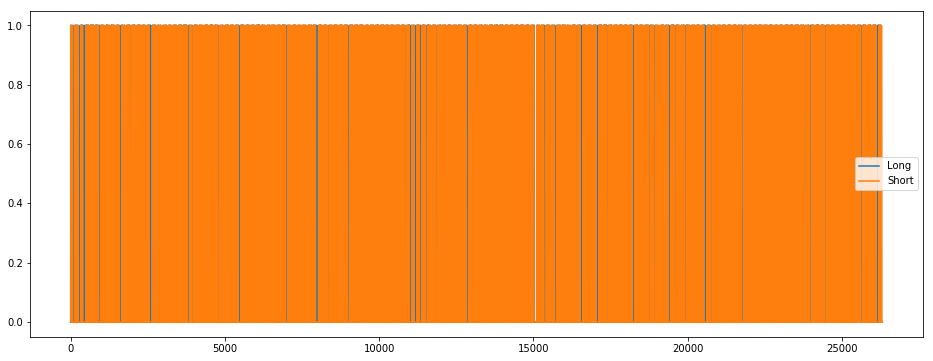

In [23]:
plt.figure(figsize=(16,6))
plt.plot(predictions_long,label = 'Long')
plt.plot(predictions_short,label = 'Short')
plt.legend()

In [24]:
backtest = pd.DataFrame()
backtest['Close_eurusd'] = df['Close_eurusd']
backtest['long'] = df['long']
backtest['short'] = df['short']
backtest.head()

,Close_eurusd,long,short
Local time,,,
10.04.2004 02:00:00.000 GMT+0200,1.20888,1,0
10.04.2004 03:00:00.000 GMT+0200,1.20888,1,0
10.04.2004 04:00:00.000 GMT+0200,1.20888,1,0
10.04.2004 05:00:00.000 GMT+0200,1.20888,1,0
10.04.2004 06:00:00.000 GMT+0200,1.20888,1,0


In [25]:
backtest = backtest.iloc[bloc1:,:]
backtest.head()

,Close_eurusd,long,short
Local time,,,
12.04.2016 15:00:00.000 GMT+0200,1.13708,0,1
12.04.2016 16:00:00.000 GMT+0200,1.13745,0,1
12.04.2016 17:00:00.000 GMT+0200,1.13950,1,0
12.04.2016 18:00:00.000 GMT+0200,1.13757,1,0
12.04.2016 19:00:00.000 GMT+0200,1.13731,1,0


In [26]:
backtest['long'].sum(),backtest['short'].sum()

(11811, 6824)

In [27]:
len(predictions_short),predictions_short.sum(),len(prediction_short),prediction_short.sum(),len(predictions_long),predictions_long.sum(),len(prediction_long),prediction_long.sum()

(26313, 5939, 26313, 26313.002, 26313, 10492, 26313, 26313.0)

In [28]:
backtest.head()

,Close_eurusd,long,short
Local time,,,
12.04.2016 15:00:00.000 GMT+0200,1.13708,0,1
12.04.2016 16:00:00.000 GMT+0200,1.13745,0,1
12.04.2016 17:00:00.000 GMT+0200,1.13950,1,0
12.04.2016 18:00:00.000 GMT+0200,1.13757,1,0
12.04.2016 19:00:00.000 GMT+0200,1.13731,1,0


In [29]:
long_pos = 0
short_pos = 0
equity = 100000
price_buy_long = 0
price_buy_short = 0
equity_list = []
nb_transaction = 0
col_profit = []
max_gain = (0,0)
max_loss = (0,0)
stop_loss = -10.
target_short = 3.
target_long = 2.

print("Boucle de backtest initiée!")

import sys
orig_stdout = sys.stdout
f = open('backtestv2_3.txt', 'w')
sys.stdout = f

for i in range(0,backtest.shape[0]):
    
    if backtest.iloc[i,1] == 1 and long_pos == 0:
        equity = equity - 1.5
        long_pos = 1
        nb_transaction += 1
        price_buy_long = backtest.iloc[i,0]
        equity_list.append(equity)
        col_profit.append(0)
        print('\n Long enclenché le ',backtest.index[i],' pour $',price_buy_long)
        
    elif backtest.iloc[i,1] == 1 and long_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)
    
    elif backtest.iloc[i,1] == 0 and long_pos == 1:
        
        if backtest.iloc[i,0] - price_buy_long > target_long:
            print('\n sortie du position long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print(' Gains en pip :',( backtest.iloc[i,0] - price_buy_long)*1000)
            equity = equity - 1.5 + (( backtest.iloc[i,0] - price_buy_long) * 100000)
            nb_transaction += 1
            col_profit.append((( backtest.iloc[i,0] - price_buy_long) * 100000))
            if ((backtest.iloc[i,0] - price_buy_long) * 100000) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * 100000))
                
            elif ((backtest.iloc[i,0] - price_buy_long) * 100000)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * 100000))
            equity_list.append(equity)
            long_pos = 0
        
        elif backtest.iloc[i,0] - price_buy_long < stop_loss:
            equity = equity - 1.5 + (( backtest.iloc[i,0] - price_buy_long) * 100000)
            print('\n sortie stop_loss du long ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_long)
            print(' Gains en pip :',(backtest.iloc[i,0] - price_buy_long)*1000)
            nb_transaction += 1
            col_profit.append(((backtest.iloc[i,0] - price_buy_long) * 100000))
            if ((backtest.iloc[i,0] - price_buy_long) * 100000) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_long) * 100000))
                
            elif ((backtest.iloc[i,0] - price_buy_long) * 100000)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_long) * 100000))
            equity_list.append(equity)
            long_pos = 0
        
        #else :
         #   equity_list.append(equity)
          #  print('Le',backtest.index[i],', il ne se passe rien')
           # col_profit.append(0)
            
for i in range(0,backtest.shape[0]):
    
    if backtest.iloc[i,1] == 1 and short_pos == 0:
        equity = equity - 1.5
        short_pos = 1
        nb_transaction += 1
        price_buy_short = backtest.iloc[i,0]
        equity_list.append(equity)
        col_profit.append(0)
        print('\n Long enclenché le ',backtest.index[i],' pour $',price_buy_short)
        
    elif backtest.iloc[i,1] == 1 and short_pos == 1 :
        equity_list.append(equity)
        print('Le',backtest.index[i],', il ne se passe rien')
        col_profit.append(0)
    
    elif backtest.iloc[i,1] == 0 and short_pos == 1:
        
        if backtest.iloc[i,0] - price_buy_short > target_short:
            print('\n sortie du position short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' Gains en pip :',( backtest.iloc[i,0] - price_buy_short)*1000)
            equity = equity - 1.5 + (( backtest.iloc[i,0] - price_buy_short) * 100000)
            nb_transaction += 1
            col_profit.append((( backtest.iloc[i,0] - price_buy_short) * 100000))
            if ((backtest.iloc[i,0] - price_buy_short) * 100000) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * 100000))
                
            elif ((backtest.iloc[i,0] - price_buy_short) * 100000)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * 100000))
            equity_list.append(equity)
            short_pos = 0
        
        elif backtest.iloc[i,0] - price_buy_short < stop_loss:
            equity = equity - 1.5 + (( backtest.iloc[i,0] - price_buy_short) * 100000)
            print('\n sortie stop_loss du short ',backtest.index[i],' pour $',backtest.iloc[i,0])    
            print("Le prix d'achat était de ",price_buy_short)
            print(' Gains en pip :',(backtest.iloc[i,0] - price_buy_short)*1000)
            nb_transaction += 1
            col_profit.append(((backtest.iloc[i,0] - price_buy_short) * 100000))
            if ((backtest.iloc[i,0] - price_buy_short) * 100000) > max_gain[1]:
                max_gain = (i,((backtest.iloc[i,0] - price_buy_short) * 100000))
                
            elif ((backtest.iloc[i,0] - price_buy_short) * 100000)< max_loss[1]:
                max_loss = (i,((backtest.iloc[i,0] - price_buy_short) * 100000))
            equity_list.append(equity)
            short_pos = 0
        
        #else :
         #   equity_list.append(equity)
          #  print('Le',backtest.index[i],', il ne se passe rien')
           # col_profit.append(0)     
            
for i in range(0,backtest.shape[0]):
    
    if backtest.iloc[i,1] == 0 and backtest.iloc[i,2] == 0 :
        
        #nb_transaction += 1
        equity_list.append(equity)
        col_profit.append(0)
        print('Le',backtest.index[i],', il ne se passe rien')
        
    
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transaction,' transactions.' )
f.close()
sys.stdout = orig_stdout
print('Boucle terminée')
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transaction,' transactions.' )


Boucle de backtest initiée!
Boucle terminée

  Les gains faramineux s'élèvent à : $ -3.0 !. En  2  transactions.


In [30]:
len(equity_list),backtest['long'].sum(),nb_transaction,equity-100000,backtest['short'].sum()

(31300, 11811, 2, -3.0, 6824)

In [31]:
gain_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gain_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [32]:
len(equity_list),len(col_profit),26452-26437

(31300, 31300, 15)

In [33]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit
#backtest_graph['col_is_win'] = col_is_win
#backtest_graph['col_cours'] = col_cours

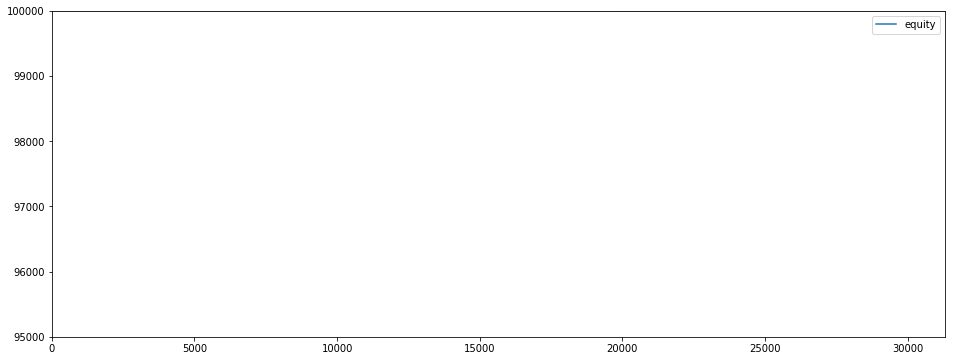

In [34]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot(ylim=95000)
plt.legend()

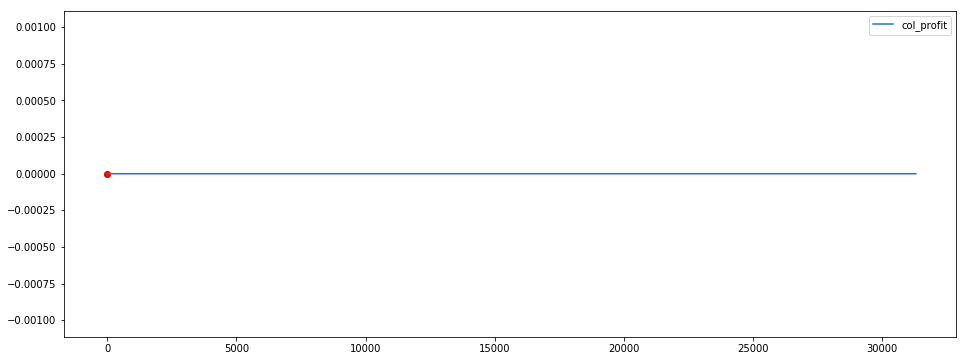

In [35]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [36]:
cumul_profit = sum(col_profit)
nul_profit = col_profit.count(0)
len_profit = len(col_profit)

In [37]:
print('Période testée :')
print('Début : ',backtest.index[0])
print('Fein : ',backtest.index[-1])
print('ROC long : ',round(roc_long*100,2),'%')
print('ROC short : ',round(roc_short*100,2),'%')
print('Transaction à $100,000')
print('Gain généré',round(equity-100000,2))
print('Nombre de transactions : ',nb_transaction)
print('Fees : ',nb_transaction*1.5)
#print('Nombre de positions gagnées',sum(col_is_win))
#print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',(round(cumul_profit/(len_profit-nul_profit),2)))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))


Période testée :
Début :  12.04.2016 15:00:00.000 GMT+0200
Fein :  13.04.2019 23:00:00.000 GMT+0200
ROC long :  78.26 %
ROC short :  73.64 %
Transaction à $100,000
Gain généré -3.0
Nombre de transactions :  2
Fees :  3.0
Gain maximal 0   0
Perte maximale 0   0


ZeroDivisionError: division by zero

In [128]:
# save the model to disk
filename = 'finalized_model_long.sav'
pickle.dump(model_long, open(filename, 'wb'))
filename = 'finalized_model_short.sav'
pickle.dump(model_short, open(filename, 'wb'))

In [139]:
len(col_profit),sum(col_profit),col_profit.count(0)

(49499,
 8935.999999999878,
 49399,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)